In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")








In [6]:
# reflect an existing database into a new model
Base = automap_base()


# reflect the tables

Base.prepare(engine, reflect=True)




In [7]:
# We can view all of the classes that automap found


Base.classes.keys()






['measurement', 'station']

In [8]:
# Save references to each table


measurement=Base.classes.measurement


station=Base.classes.station



In [9]:
# Create our session (link) from Python to the DB


session=Session(engine)




engine.execute('SELECT * FROM measurement LIMIT 20').fetchall()





[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0)]

In [10]:
engine.execute('SELECT * FROM station LIMIT 20').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Exploratory Climate Analysis

2016-08-23


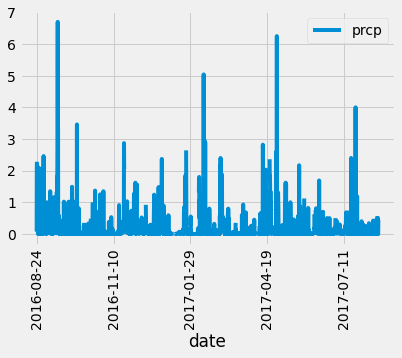

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_date=session.query(measurement.date).order_by(measurement.date.desc()).first()

date=dt.date(2017,8,23)




# Calculate the date 1 year ago from the last data point in the database
one_year_date=date-dt.timedelta(days=365)
print(one_year_date)

# Perform a query to retrieve the data and precipitation scores




date_prcp=session.query(measurement.date,measurement.prcp).filter(measurement.date>one_year_date).\
order_by(measurement.date).all()


# Save the query results as a Pandas DataFrame and set the index to the date column

df=pd.DataFrame(date_prcp)
df


# Sort the dataframe by date

df_sorted_date = df.sort_values(by="date")

df_sorted_date.plot(x='date', y='prcp', rot=90)










In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df.dropna()

df['prcp'].describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [13]:
aggregate=df['prcp']

summary_table=aggregate.agg(['mean','std','max','min','median','var'])

summary_df=pd.DataFrame(summary_table)

summary_df

,prcp
mean,0.176462
std,0.460288
max,6.700000
min,0.000000
median,0.020000
var,0.211865


In [14]:
# Design a query to show how many stations are available in this dataset?
locations=session.query(station.station).count()

print(f'There are {locations} stations available')

There are 9 stations available


In [15]:
locations=session.query(station.station)


df_locations=pd.DataFrame(locations)


df_locations

,station
0,USC00519397
1,USC00513117
2,USC00514830
3,USC00517948
4,USC00518838
5,USC00519523
6,USC00519281
7,USC00511918
8,USC00516128


In [16]:
# What are the most active stations? (i.e. what stations have the most rows)?


# List the stations and the counts in descending order.

count_=func.count(measurement.station)

active_stations=session.query(measurement.station,count_).group_by(measurement.station).\
order_by(count_.desc()).all()
active_stations


most_active=active_stations[0][0]

most_active

'USC00519281'

In [46]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 


highest_temperature=session.query(func.max(measurement.tobs)).filter(measurement.station==most_active).all()
print(highest_temperature)

lowest_temperature=session.query(func.min(measurement.tobs)).filter(measurement.station==most_active).all()
print(lowest_temperature)
avarage_temperature=session.query(func.avg(measurement.tobs)).filter(measurement.station==most_active).all()
print(avarage_temperature)
# highest temperature recorded, and average temperature of the most active station?


[(85.0,)]
[(54.0,)]
[(71.66378066378067,)]


In [18]:
# Choose the station with the highest number of temperature observations.

most_active


# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_twelve_most_active=session.query(measurement.tobs).\
filter(measurement.station==most_active,measurement.date>one_year_date).all()

last_twelve_most_active=pd.DataFrame(last_twelve_most_active)


last_twelve_most_active

#temperatures= []

#for x in last_twelve_most_active:
    

   # print(y)
      


        
        
        

,tobs
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0
...,...
346,77.0
347,77.0
348,76.0
349,76.0


In [19]:
last_twelve_most_active=session.query(measurement.date,measurement.tobs).\
filter(measurement.station==most_active,measurement.date>one_year_date).all()

last_twelve_most_active=pd.DataFrame(last_twelve_most_active)

last_twelve_most_active



,date,tobs
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0
...,...,...
346,2017-08-14,77.0
347,2017-08-15,77.0
348,2017-08-16,76.0
349,2017-08-17,76.0


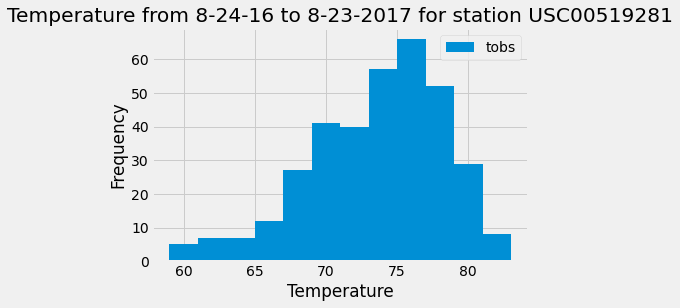

In [20]:
plt.hist(last_twelve_most_active['tobs'],bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.title(f'Temperature from 8-24-16 to 8-23-2017 for station {most_active}')

plt.legend(['tobs'])

plt.show()

## Bonus Challenge Assignment

In [21]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

NameError: name 'Measurement' is not defined

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
